In [5]:
# To get multi output in jupyternotebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# sklearn ciktisini nnumpy array olarak donmektedir. Bu adimi pandas icin ayarlayabiliriz.
from sklearn import set_config
set_config(transform_output="pandas")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

data=pd.read_csv('../data/feature-engine/boston.csv')
x=data[['RM', 'LSTAT', 'CRIM', 'AGE', 'DIS', 'NOX']]
y=data[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

#### Olceklendirme (Scaling)

Veri ölçeklendirme, makine öğrenimi modelleri oluştururken önemli bir adımdır. İşte nedenleri:

1. **Standardizasyon (Standartlaştırma- Z-score)**: Verileri merkez etrafında yani ortalamasi 0 ile standart sapma 1 değeriyle standartlaştırmak, farklı birimlerde ölçülen verileri karşılaştırırken önemlidir. BU islem aslinda istatistikte z-score hesaplamaktir. Farklı ölçeklerde ölçülen değişkenler, analize eşit katkıda bulunmadigindan model uzerinde yanlılık yaratabilir. Örneğin, 0 ile 1000 arasında değer alan bir değişken, 0 ile 1 arasında değer alan bir değişkeni ağırlıklandırabilir. Verileri karşılaştırılabilir ölçeklere dönüştürmek bu sorunu önleyebilir. Degiskenlerden ortama deger $\mu$ cikartilip standart sapma $\sigma$ degerine bolunerek hesaplanir.

$$z = \frac{X-\mu}{\sigma}$$

Verinin sahip oldugu dagilimi korumasini avantaj olarak degerlendirerken aykiri degerleri de korumaya devam etmesi ve bellir bir deger araligina sıkıştırmaması gibi negatif yonleri de soylenebilir.

3. **Normalizasyon**: Normalizasyonun amacı, veri setindeki sayısal sütunların değerlerini ortak bir ölçeğe dönüştürmek ve değer aralıklarındaki farkları bozmadan yapmaktır. Her veri kümesi normalizasyon gerektirmez. Yalnızca özellikler farklı aralıklara sahip olduğunda gereklidir. Örneğin, yaş ve gelir (x2) içeren bir veri kümesini düşünün. Yaş 0-100 arasında değişirken, gelir 0-100.000 ve daha yüksek aralıklarda değişir. Gelir yaşa göre yaklaşık 1000 kat daha büyüktür. Bu iki özellik çok farklı aralıklardadır. Çoklu değişkenli doğrusal regresyon gibi daha fazla analiz yaptığımızda, gelir özelliği daha büyük değeri nedeniyle sonucu daha fazla etkileyecektir.

- `MinMaxScaler` min-max normalization $$\bar{X} = \frac{X-\min{X}}{\max{X} - \min{X}}$$
    * Degerleri [0,1] araligina tasir.
    * Degiskenlerin varyans ve ortalamasi farklidir.
    * Aykiri degerlere duyarlidir. 
- `MaxAbsScaler` max-abs normalization $$\bar{X} = \frac{X}{\max{|X|}}$$
    * Degerleri [-1,1] araligina tasir. Isaretleri korur.
    * Degiskenlerin varyans ve ortalamasi farklidir.
    * Aykiri degerlere duyarlidir.
- `RobustScaler` median-quantile normalization $$\bar{X} = \frac{X-\mbox{median}}{ Q_3{X} - Q_1{X}}$$
    * Degerlerin medyan degeri 0 ceyrelik acikligini birim hale getirir.
    * Degiskenlerin varyans ve ortalamasi ve deger araliklari farklidir.
    * Aykiri degerlere az duyarlidir. 

- [Feature Scaling: Standardization vs. Normalization And Various Types of Normalization](https://mkang32.github.io/python/2020/12/27/feature-scaling.html)
- [How, When, and Why Should You Normalize / Standardize / Rescale Your Data?](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)
- [Scaling of data before building model is necessary for all the models](https://stackoverflow.com/questions/53957504/scaling-of-data-before-building-model-is-necessary-for-all-the-models-or-not)

- [Sklearn Scaler ve Outliers karsilastirmasi](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-normalizer-section)

- [\*\* Sklearn icerisinde Scaler onemi](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

<img src='../images/scaling-gradient.png' width='500'>

[Kaynakca](https://stackoverflow.com/questions/46686924/why-scaling-data-is-very-important-in-neural-networklstm/46688787#46688787)]

- Olceklendirmeye duyarli modeller

    - Gradient Descent optimizasyon yontemini kullananan algoritmalar
        * Linear and Logistic Regression (may not use Gradient Descent)
        * Neural Networks

    - Distance-based algoritmalar
        * Support Vector Machines
        * KNN
        * K-means clustering

    - Varyansin maksimum oldugu yonleri arastiran algoritmalar
        * Principal Component Analysis (PCA)
        * Linear Discriminant Analysis (LDA)

- Olceklendirmeden etkilenmeyen modeller
    - Tree-based algorithms
        + Decision Tree
        + Random Forest
        + Gradient Boosted Trees

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

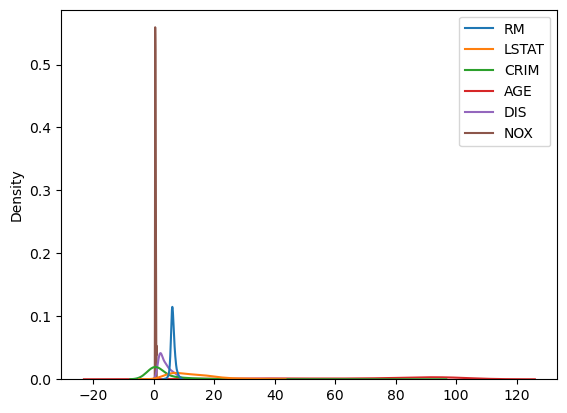

In [21]:
sns.kdeplot(X_train)

StandardScaler()

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

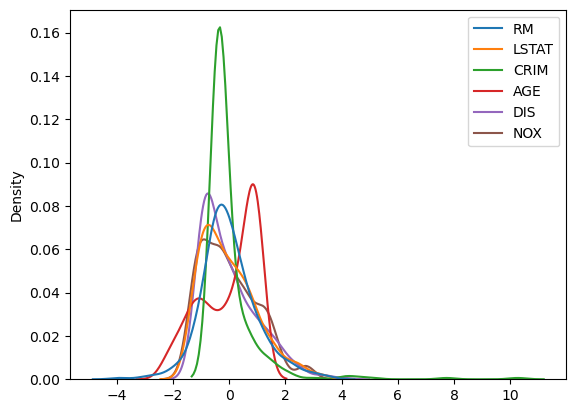

In [22]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

MinMaxScaler()

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

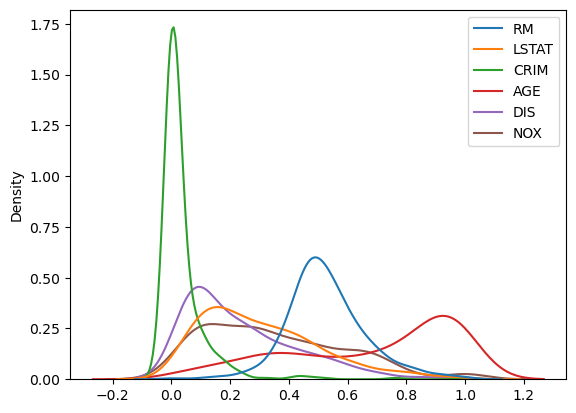

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler_std = MinMaxScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

MaxAbsScaler()

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

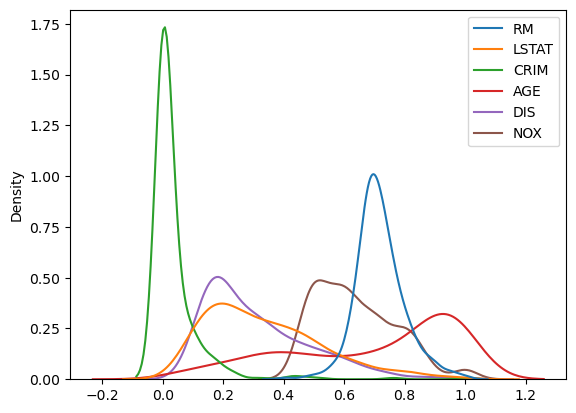

In [24]:
from sklearn.preprocessing import MaxAbsScaler
scaler_std = MaxAbsScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

RobustScaler()

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

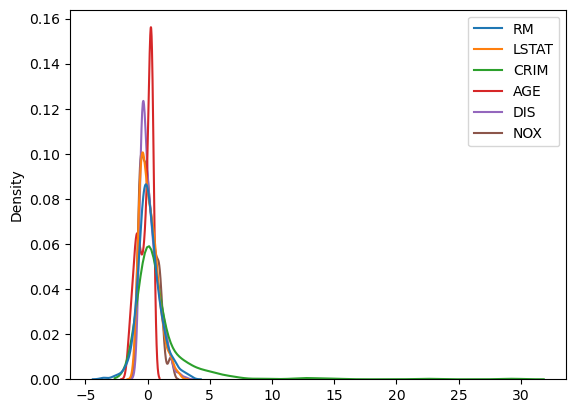

In [25]:
from sklearn.preprocessing import RobustScaler
scaler_std = RobustScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

### Outlier degerleri iceri alalim ve bir daha scaler edelim.

Pipeline(steps=[('winsorizer', Winsorizer(tail='both')),
                ('robust_scaler', RobustScaler())])

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

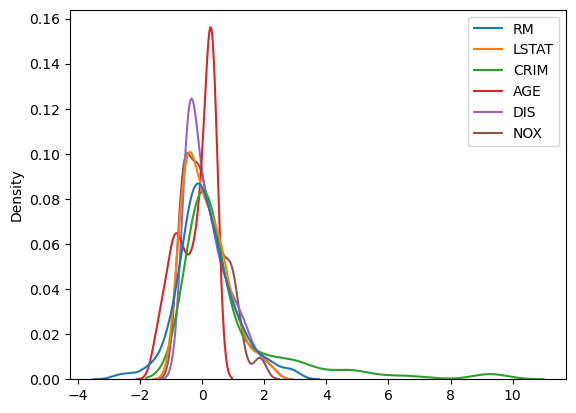

In [28]:
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

preprocessor=Pipeline(steps=[
    ('winsorizer', Winsorizer(capping_method='gaussian', tail='both')),
    ('robust_scaler',RobustScaler())
])


preprocessor.fit(X_train)
X_train_scaled_std = preprocessor.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

#### Birim norm'a sahip olma (Normalizer)
Normalizer donusturucusu simdiye kadar bahsedilenlerden farklidir, karistirilmamalidir. Bu donusturucu örnekleri (veri matrisinin her satırını) bağımsız olarak birim norma normalize eder. Yani, en az bir sıfır olmayan bileşeni olan her örneği diğer örneklerden bağımsız olarak yeniden ölçekler ve normu (l1, l2 veya inf) bir yapar. Bu işlem, metin sınıflandırması veya kümeleme gibi durumlar için yaygın bir işlemdir.

In [29]:
from sklearn.preprocessing import Normalizer

X = [
    [4, 1, 2, 2],
    [1, 3, 9, 3],
    [5, 7, 5, 1]
]

transformer = Normalizer().fit(X)  # fit işlemi bir şey yapmaz
normalized_X = transformer.transform(X)
print(normalized_X)


    x0   x1   x2   x3
0  0.8  0.2  0.4  0.4
1  0.1  0.3  0.9  0.3
2  0.5  0.7  0.5  0.1


Normalizer()

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

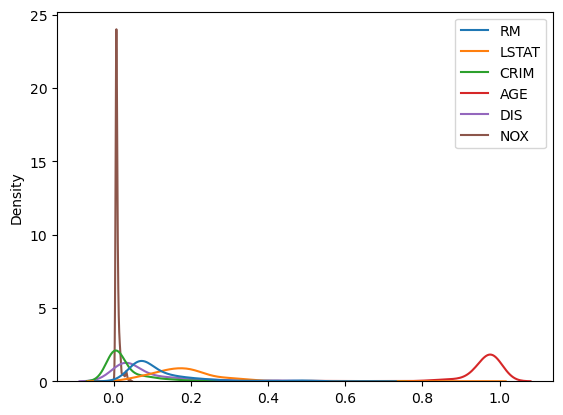

In [30]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train)
X_train_normal= normalizer.transform(X_train)
X_train_normal = pd.DataFrame(X_train_normal, columns=X_train.columns)
sns.kdeplot(X_train_normal)